In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Load the dataset
glass_df = pd.read_excel('/content/glass.xlsx')


**EDA**

In [ ]:
# Check for missing values
print("Missing values in each column:")
print(glass_df.isnull().sum())

Missing values in each column:
RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64


In [ ]:
# Basic statistics of the dataset
print("\nBasic statistics of the dataset:")
print(glass_df.describe())



Basic statistics of the dataset:
               RI          Na          Mg          Al          Si           K  \
count  214.000000  214.000000  214.000000  214.000000  214.000000  214.000000   
mean     1.518365   13.407850    2.684533    1.444907   72.650935    0.497056   
std      0.003037    0.816604    1.442408    0.499270    0.774546    0.652192   
min      1.511150   10.730000    0.000000    0.290000   69.810000    0.000000   
25%      1.516522   12.907500    2.115000    1.190000   72.280000    0.122500   
50%      1.517680   13.300000    3.480000    1.360000   72.790000    0.555000   
75%      1.519157   13.825000    3.600000    1.630000   73.087500    0.610000   
max      1.533930   17.380000    4.490000    3.500000   75.410000    6.210000   

               Ca          Ba          Fe        Type  
count  214.000000  214.000000  214.000000  214.000000  
mean     8.956963    0.175047    0.057009    2.780374  
std      1.423153    0.497219    0.097439    2.103739  
min      5.4

In [ ]:
# Check for duplicates
print("\nNumber of duplicate rows:", glass_df.duplicated().sum())



Number of duplicate rows: 1


In [ ]:
# Check data types
print("\nData types of columns:")
print(glass_df.dtypes)


Data types of columns:
RI      float64
Na      float64
Mg      float64
Al      float64
Si      float64
K       float64
Ca      float64
Ba      float64
Fe      float64
Type      int64
dtype: object


**Visualization**


Creating histograms...


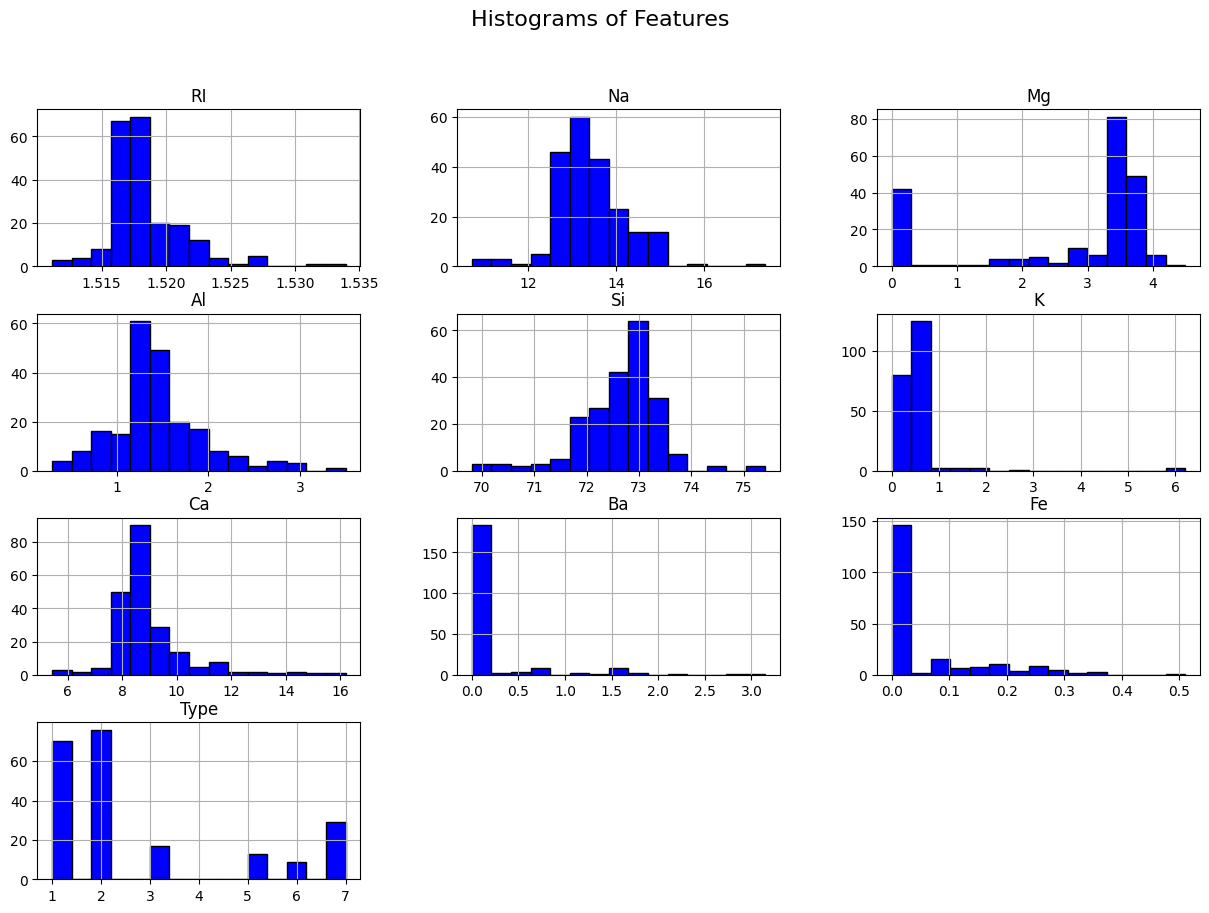

In [ ]:
# Histograms for each feature
print("\nCreating histograms...")
glass_df.hist(bins=15, figsize=(15, 10), color='blue', edgecolor='black')
plt.suptitle('Histograms of Features', fontsize=16)
plt.show()


Creating box plots...


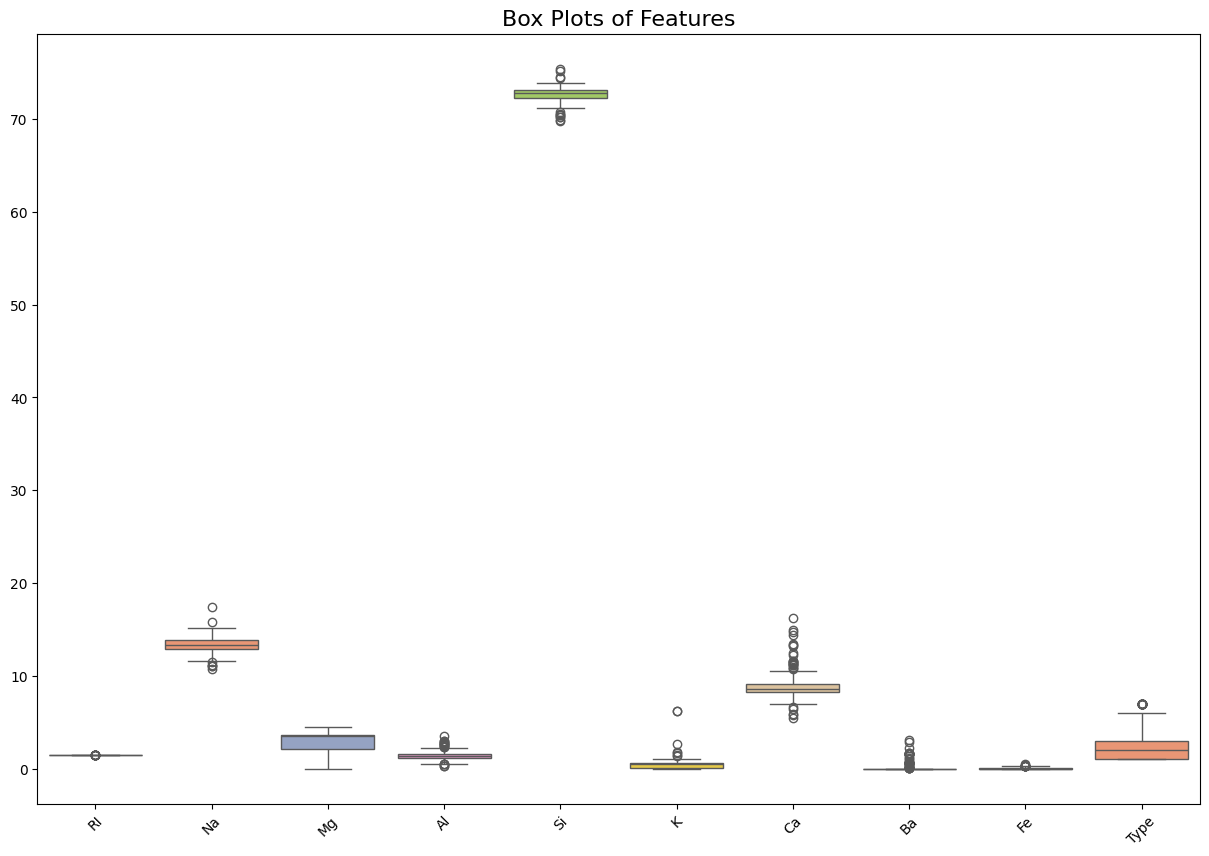

In [ ]:
# Box plots for detecting outliers
print("\nCreating box plots...")
plt.figure(figsize=(15, 10))
sns.boxplot(data=glass_df, palette='Set2')
plt.title('Box Plots of Features', fontsize=16)
plt.xticks(rotation=45)
plt.show()


Creating correlation heatmap...


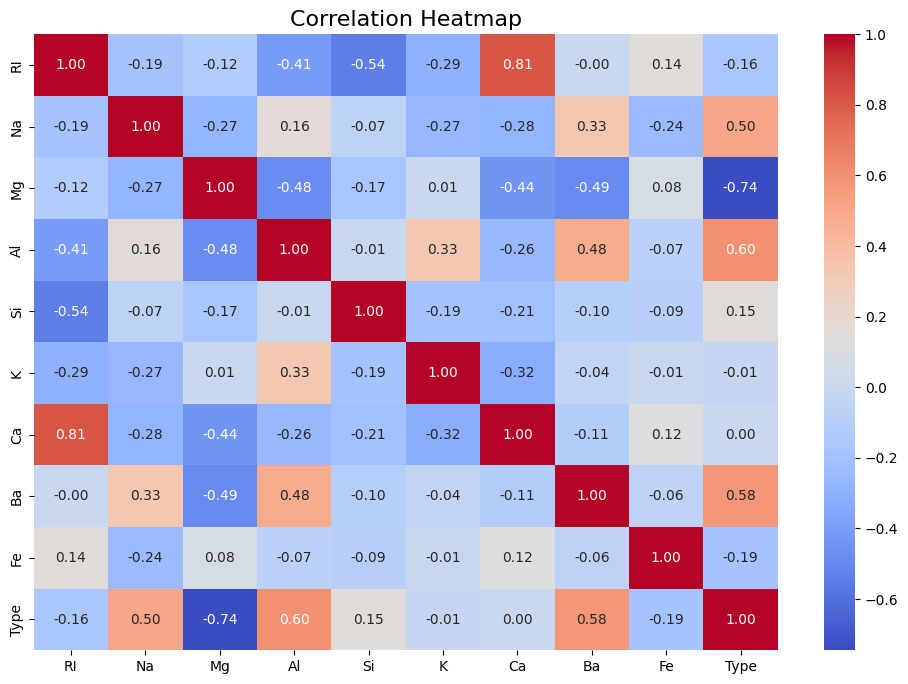

In [ ]:
# Correlation heatmap
print("\nCreating correlation heatmap...")
plt.figure(figsize=(12, 8))
corr_matrix = glass_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap', fontsize=16)
plt.show()


Creating pair plots...


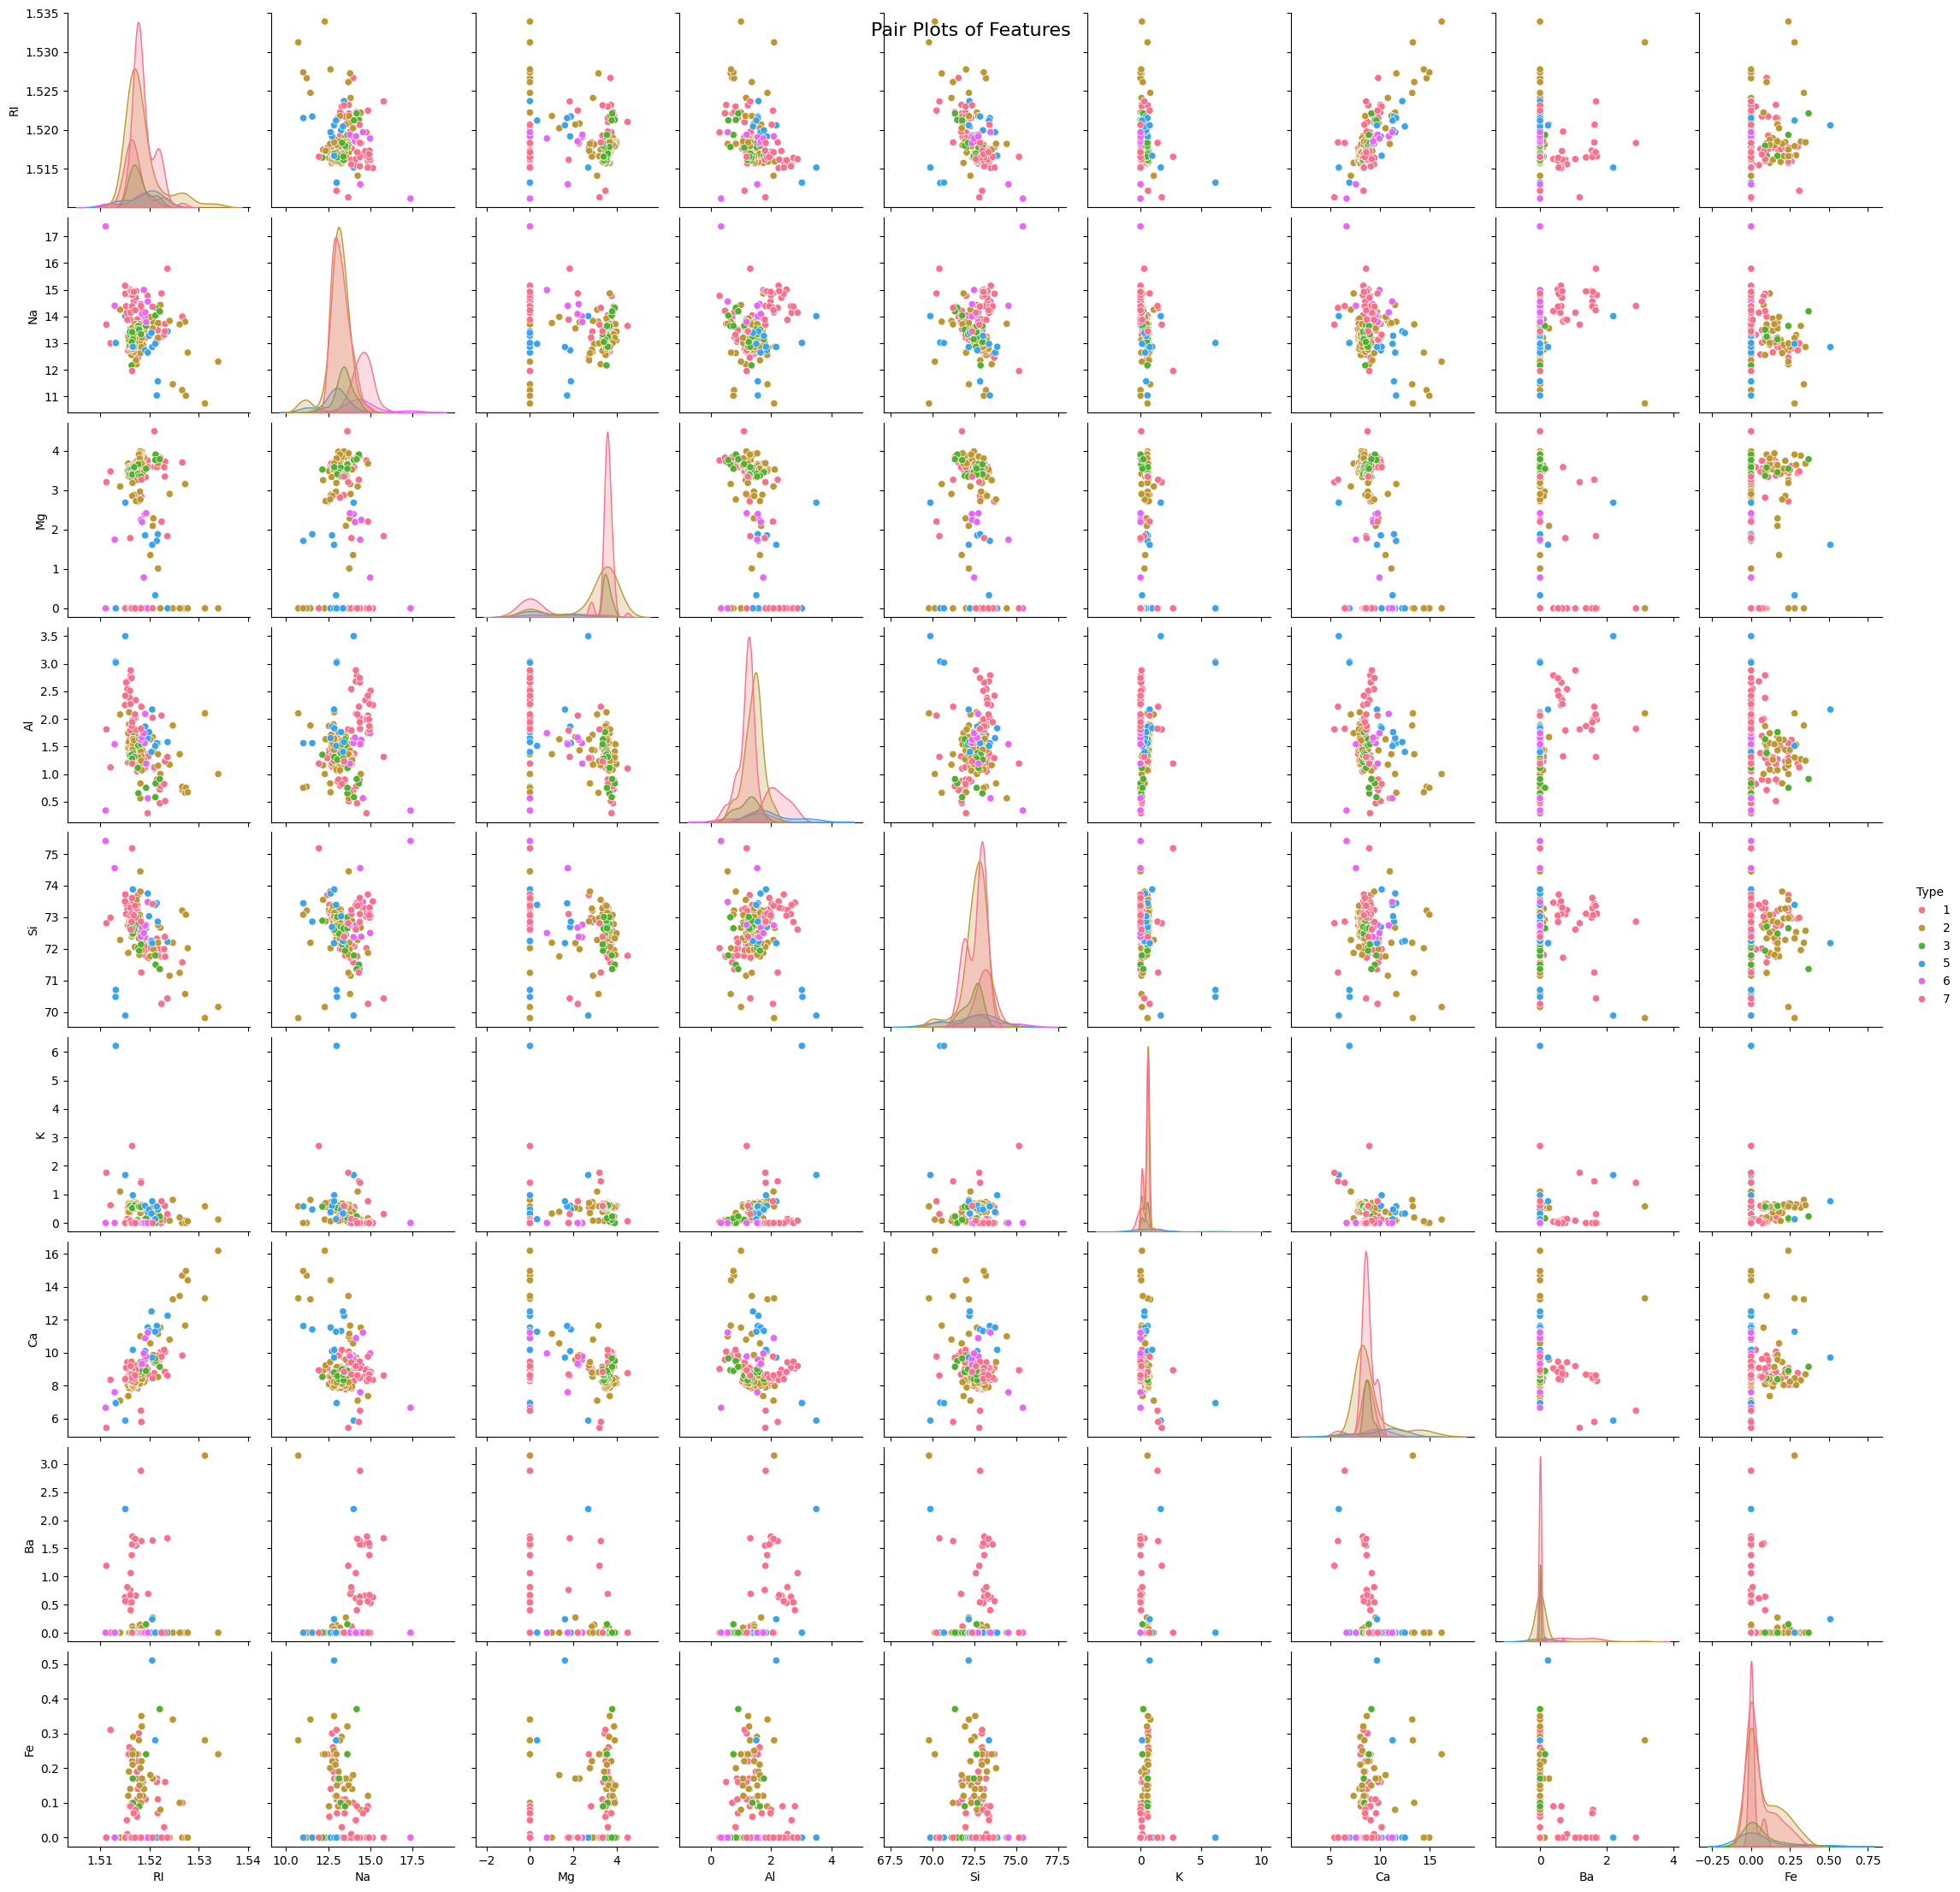

In [ ]:
# Pair plots
print("\nCreating pair plots...")
sns.pairplot(glass_df, hue='Type', palette='husl')
plt.suptitle('Pair Plots of Features', fontsize=16)
plt.show()

Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample
scaler = StandardScaler()
X = glass_df.drop('Type', axis=1)
X_scaled = scaler.fit_transform(X)
y = glass_df['Type']


In [ ]:
# Handling imbalanced data
print("Original class distribution:")
print(y.value_counts())

Original class distribution:
Type
2    76
1    70
7    29
3    17
5    13
6     9
Name: count, dtype: int64


In [ ]:
data = pd.concat([pd.DataFrame(X_scaled, columns=X.columns), y], axis=1)
majority_class = data[data['Type'] == data['Type'].mode()[0]]
minority_classes = [data[data['Type'] == t] for t in data['Type'].unique() if t != data['Type'].mode()[0]]

In [ ]:
balanced_data = majority_class
for minority_class in minority_classes:
    upsampled = resample(minority_class,
                         replace=True,
                         n_samples=len(majority_class),
                         random_state=42)
    balanced_data = pd.concat([balanced_data, upsampled])

balanced_data = balanced_data.sample(frac=1, random_state=42).reset_index(drop=True)
X_balanced = balanced_data.drop('Type', axis=1)
y_balanced = balanced_data['Type']

In [ ]:
print("Balanced class distribution:")
print(y_balanced.value_counts())

Balanced class distribution:
Type
6    76
2    76
3    76
1    76
7    76
5    76
Name: count, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
#Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)

In [ ]:
#Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

In [ ]:
print("Random Forest Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.2f}")
print(f"Precision: {precision_score(y_test, y_pred_rf, average='weighted'):.2f}")
print(f"Recall: {recall_score(y_test, y_pred_rf, average='weighted'):.2f}")
print(f"F1-Score: {f1_score(y_test, y_pred_rf, average='weighted'):.2f}")

Random Forest Performance:
Accuracy: 0.90
Precision: 0.91
Recall: 0.90
F1-Score: 0.90


**Bagging Classifier**

In [ ]:
# Bagging Classifier
bagging_model = BaggingClassifier(estimator=RandomForestClassifier(), random_state=42) # Changed 'base_estimator' to 'estimator'
bagging_model.fit(X_train, y_train)
y_pred_bagging = bagging_model.predict(X_test)

In [ ]:
print("Bagging Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_bagging):.2f}")
print(f"Precision: {precision_score(y_test, y_pred_bagging, average='weighted'):.2f}")
print(f"Recall: {recall_score(y_test, y_pred_bagging, average='weighted'):.2f}")
print(f"F1-Score: {f1_score(y_test, y_pred_bagging, average='weighted'):.2f}")

Bagging Performance:
Accuracy: 0.89
Precision: 0.90
Recall: 0.89
F1-Score: 0.89


**Boosting Classifier**

In [ ]:
# Boosting Classifier
boosting_model = GradientBoostingClassifier(random_state=42)
boosting_model.fit(X_train, y_train)
y_pred_boosting = boosting_model.predict(X_test)


In [ ]:
print("Boosting Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_boosting):.2f}")
print(f"Precision: {precision_score(y_test, y_pred_boosting, average='weighted'):.2f}")
print(f"Recall: {recall_score(y_test, y_pred_boosting, average='weighted'):.2f}")
print(f"F1-Score: {f1_score(y_test, y_pred_boosting, average='weighted'):.2f}")


Boosting Performance:
Accuracy: 0.91
Precision: 0.92
Recall: 0.91
F1-Score: 0.91
